In [104]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import train_test_split


# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report


In [4]:
df = pd.read_csv("Patient's Sickness Prediction/cardio.csv")
df.info()
df.describe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [47]:
df =df.drop("id", axis=1)
new_file_name = "cardio_without_id.csv"

df.to_csv(new_file_name, index=False)

print(f"Data saved successfully to: {new_file_name}")


Data saved successfully to: cardio_without_id.csv


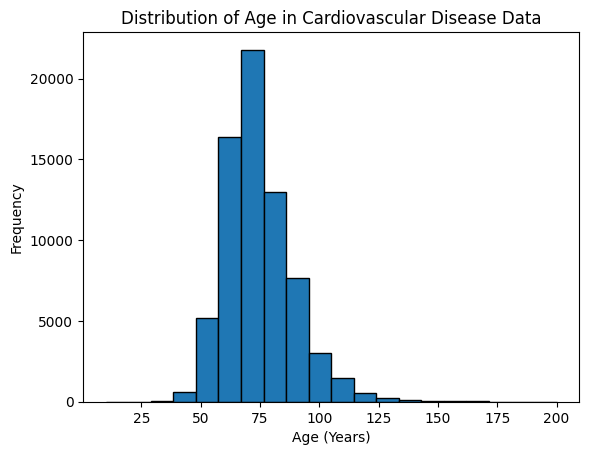

In [37]:
df["age_in_years"] = df["age"] / 365
plt.hist(df["weight"], bins=20, edgecolor="black")  
plt.xlabel("Age (Years)")
plt.ylabel("Frequency")
plt.title("Distribution of Age in Cardiovascular Disease Data")
plt.show()

#in this line we created a new row which is age in years


this function was used to see the features for those who're less than 50 kg 

# def plot_underweight_data(data_path, weight_column="weight"):


#   # Load data from CSV file
#   data = pd.read_csv(data_path)

#   # Filter data for individuals with weight less than 50
#   underweight_data = data[data[weight_column] < 50]

#   # Check if any data points meet the criteria
#   if underweight_data.empty:
#     print("No data points found for individuals weighing less than 50.")
#     return

#   # Explore the data (optional)
#   # You can add code here to explore other features of the underweight data (e.g., using describe())

#   # Plot the data (replace with your desired plot type)
#   # Here, we're plotting all numerical features vs index
#   for feature in underweight_data.select_dtypes(include=[np.number]):
#     plt.plot(underweight_data.index, underweight_data[feature])
#     plt.xlabel("Index")
#     plt.ylabel(feature)
#     plt.title(f"Features of Individuals Weighing Less Than 50 ({feature})")
#     plt.show()

# # Example usage (replace "cardio.csv" with your actual file path)
# plot_underweight_data("Patient's Sickness Prediction/cardio.csv","weight")

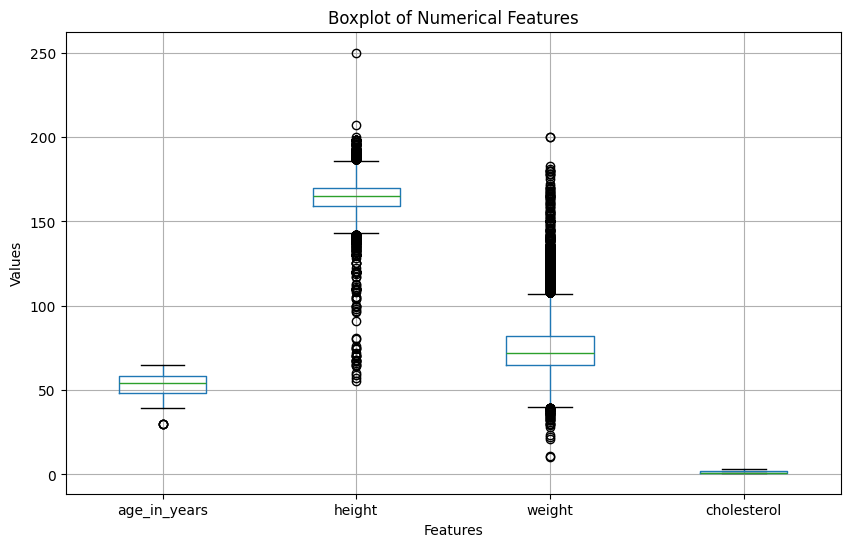

In [31]:
df.isnull().sum();

numerical_features = ['age_in_years', 'height', 'weight', 'cholesterol']

df[numerical_features].boxplot(figsize=(10, 6))

plt.title('Boxplot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()


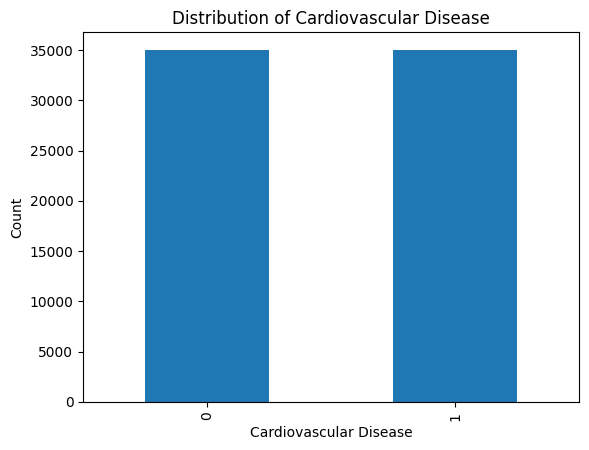

In [12]:
#here we checked if the data is balanced or not by seeing the distribution of the target variable
df["cardio"].value_counts().plot(kind="bar")
plt.xlabel("Cardiovascular Disease")
plt.ylabel("Count")
plt.title("Distribution of Cardiovascular Disease")
plt.show()

In [24]:
# Check for negative age or extreme values in height/weight
print(f"Minimum Age: {(df['age'].min())}") # we divide by 365 to get age in years
print(f"Maximum Height: {df['height'].min()}")
print(f"Minimum Weight: {df['weight'].min()}")

# # Explore Blood Pressure ranges (you can adjust these based on your research)
# print(f"Blood Pressure (systolic) - Possible outliers below: {df[df['ap_hi'] < 80]}")  
# print(f"Blood Pressure (systolic) - Possible outliers above: {df[df['ap_hi'] > 220]}")  


Minimum Age: 10798
Maximum Height: 55
Minimum Weight: 10.0
Blood Pressure (systolic) - Possible outliers below:           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
567      815  21281       1     168    78.0     14     90            2     1   
636      913  20457       2     169    68.0     70    110            1     1   
927     1294  21867       2     175    70.0     14     90            3     1   
979     1360  18225       1     172    65.0     11     80            1     3   
1600    2260  19201       1     165    66.0     12     80            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
68630  98039  21217       1     160    59.0     12     80            1     1   
68742  98213  18755       1     158    74.0     14     90            1     1   
68998  98568  19107       1     154    77.0     14     90            1     1   
69137  98743  15442       2     176    65.0     12     80            1     1   
69549  9

we caught an important imbalance according to the relation between the weight, height, age...

so what are we going to do is that we're going to measure the bmi of every person and see if it is less than 10 it is probably in most cases impossible and he/she should be dead 
from that point according to the amount of those who have a bmi less than 10 we're going to decide what todo in the data

In [69]:

def calculate_bmi_and_count_underweight(data, weight_column="weight", height_column="height"):


  # Check if weight and height columns exist
  if weight_column not in data.columns or height_column not in data.columns:
    raise ValueError(f"Columns '{weight_column}' and '{height_column}' not found in data.")

  # Calculate BMI (assuming height is in meters)
  df["BMI"] = df[weight_column] / ((df[height_column] /100) **2)

#this edit in the method was to change between counting them and displaying their data
  # # Count the number of underweight individuals (BMI < 10)
  # count_underweight = df[df["BMI"] < 13].shape[0]

  # return count_underweight, df


  # Count the number of underweight individuals (BMI < 10)
  underweight_data = df[df["BMI"] < 10]

  # Return data of underweight individuals
  return underweight_data
# Example usage (assuming your data is in a DataFrame named 'cardio_data')
count_underweight = calculate_bmi_and_count_underweight(df, weight_column="weight", height_column="height")

print(f"Number of people with BMI less than 10: {count_underweight}")
# The data_with_bmi DataFrame now includes a new 'BMI' column


Number of people with BMI less than 10:          age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
26806  23284       1     157    23.0    110     80            1     1      0   
29488  20408       2     177    22.0    120     80            1     1      1   
33817  21582       2     178    11.0    130     90            1     1      0   
57858  18804       2     165    10.0    180   1100            2     2      0   
60188  21855       1     162    21.0    120     80            2     1      0   
60699  18875       1     171    29.0    110     70            2     1      0   

       alco  active  cardio  age_in_years       BMI  
26806     0       1       0     63.791781  9.331007  
29488     1       1       0     55.912329  7.022248  
33817     0       1       1     59.128767  3.471784  
57858     0       1       1     51.517808  3.673095  
60188     0       1       1     59.876712  8.001829  
60699     0       1       1     51.712329  9.917581  


As we can see the number of data rows who are mostly wrong is 13 in relative to 70000 the removing of those 13 will make no problem at all 

In [72]:
def drop_underweight_rows(dataframe, bmi_column="BMI"):
    # Drop rows with BMI less than 10
    dataframe.drop(dataframe[dataframe[bmi_column] < 10].index, inplace=True)
    
    return dataframe
drop_underweight_rows(df, bmi_column="BMI")

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,BMI
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,52.712329,26.927438
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1,61.920548,50.472681
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.235616,31.353579
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.454795,27.099251


In [85]:

def find_blood_pressure_outliers(data, sbp_column="SystolicBP", dbp_column="DiastolicBP", 
                                 low_thresh_sbp=80, high_thresh_sbp=200, 
                                 low_thresh_dbp=60, high_thresh_dbp=200):

  # Filter for outlier values (outside thresholds) in either SBP or DBP
  outliers = data[((data[sbp_column] < low_thresh_sbp) | (data[sbp_column] > high_thresh_sbp)) |
                ((data[dbp_column] < low_thresh_dbp) | (data[dbp_column] > high_thresh_dbp))]

  return outliers

# Example usage (assuming your data is in a DataFrame named 'cardio_data')
blood_pressure_outliers = find_blood_pressure_outliers(df, sbp_column="ap_hi", dbp_column="ap_lo")

if blood_pressure_outliers.empty:
  print("No blood pressure outliers found in the dataset.")
else:
  print("Following rows contain outlier blood pressure values:")
  print(blood_pressure_outliers)


Following rows contain outlier blood pressure values:
         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
228    17489       2     183    98.0    160   1100            1     2      1   
241    21932       2     157    60.0    160   1000            2     1      0   
260    18217       1     150    83.0    140    800            1     1      0   
329    23407       1     176    63.0    160   1000            2     2      0   
345    18704       1     154    81.0    140   1000            2     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69771  23330       1     167    81.0    160   1000            1     1      0   
69872  21808       1     152    56.0    160   1000            1     1      0   
69878  21239       2     168    95.0    160   1000            1     1      0   
69885  22417       2     166    78.0    170   1000            1     1      0   
69967  21416       2     168    63.0    140   1000            1   

In [87]:
correlation_matrix = df.corr()

# Print the correlation matrix (optional)
print(correlation_matrix)

                   age    gender    height    weight     ap_hi     ap_lo  \
age           1.000000 -0.022808 -0.081524  0.053895  0.020770  0.017676   
gender       -0.022808  1.000000  0.499015  0.155646  0.005997  0.015153   
height       -0.081524  0.499015  1.000000  0.291330  0.005488  0.006149   
weight        0.053895  0.155646  0.291330  1.000000  0.030726  0.044064   
ap_hi         0.020770  0.005997  0.005488  0.030726  1.000000  0.016063   
ap_lo         0.017676  0.015153  0.006149  0.044064  0.016063  1.000000   
cholesterol   0.154448 -0.035807 -0.050220  0.141922  0.023775  0.023955   
gluc          0.098733 -0.020516 -0.018581  0.106909  0.011833  0.010703   
smoke        -0.047643  0.338118  0.187948  0.067910 -0.000919  0.005214   
alco         -0.029741  0.170917  0.094348  0.067316  0.001412  0.010627   
active       -0.009951  0.005853 -0.006590 -0.016716 -0.000033  0.004747   
cardio        0.238186  0.008101 -0.010845  0.181904  0.054473  0.065660   
age_in_years

we applied here correlation analysis to see if there is any relation between SBP and DBP and other features to see if we can apply knn to fix the wrong values in these two column but and most values were two low; so they don't have any correlation and from that point applying KNN will be missleading 

The best thing todo here is to remove those values because they're also around 1000 in a 700000 dataset which will not cause that affect

In [97]:
import pandas as pd

def clean_blood_pressure_column(data, column_name, low_thresh, high_thresh, inplace=True):

  # Filter for invalid values (negative, zero, or outside thresholds)
  invalid_values = (data[column_name] < low_thresh) | (data[column_name] == 0) | (data[column_name] > high_thresh)

  if inplace:
    # Modify the original DataFrame (inplace)
    data.drop(data[invalid_values].index, inplace=True)
  else:
    # Return a new cleaned DataFrame
    cleaned_data = data.drop(data[invalid_values].index)
    return cleaned_data
  


clean_blood_pressure_column(df, "ap_hi", 10, 300)
clean_blood_pressure_column(df, "ap_lo", 10, 300)




After consulting exprets we removed extreme wrong data which are above 300 or less than 10 in both column 


In [99]:

def find_blood_pressure_outliers(data, sbp_column="SystolicBP", dbp_column="DiastolicBP", 
                                 low_thresh_sbp=10, high_thresh_sbp=300, 
                                 low_thresh_dbp=10, high_thresh_dbp=300):

  # Filter for outlier values (outside thresholds) in either SBP or DBP
  outliers = data[((data[sbp_column] < low_thresh_sbp) | (data[sbp_column] > high_thresh_sbp)) |
                ((data[dbp_column] < low_thresh_dbp) | (data[dbp_column] > high_thresh_dbp))]

  return outliers

# Example usage (assuming your data is in a DataFrame named 'cardio_data')
blood_pressure_outliers = find_blood_pressure_outliers(df, sbp_column="ap_hi", dbp_column="ap_lo")

if blood_pressure_outliers.empty:
  print("No blood pressure outliers found in the dataset.")
else:
  print("Following rows contain outlier blood pressure values:")
  print(blood_pressure_outliers)


No blood pressure outliers found in the dataset.


In [103]:
import pandas as pd

def get_max_value(data, column_name):


  # Get the maximum value
  max_value = data[column_name].max()
  min_value = data[column_name].min()
  return max_value, min_value

# 
print( { get_max_value(df, "active")})
print( {get_max_value(df, "gluc")})
print( { get_max_value(df, "smoke")})
print( { get_max_value(df, "alco")})


{(1, 0)}
{(3, 1)}
{(1, 0)}
{(1, 0)}


now we checked all the columns 
No missing values 
no wrong values 


now it is time to split the cleaned data into training and testing dataset

In [ ]:
X = df.drop("cardio", axis=1)
Y = df["cardio"]
x_train , x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)